# 作业三：分类、预测与聚类


**姓名**：邢晓宇  
**学号**：5720201116 
 
**GitHub**: https://github.com/OnePunchV/DataMining

# 目录

### 1. 处理数据集
  * 1.1 加载数据集  
  * 1.2 数据摘要

### 2. 电子游戏市场分析


### 3. 预测每年电子游戏销售额
  * 3.1 建立多项式回归模型
  * 3.2 模型评价


### 4. 可视化应用


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

## 1.处理数据集
 ### 1.1 加载数据集
  * 数据集中共有11列，16598行。

In [2]:
df = pd.read_csv('vgsales.csv')
print('%d columns' % len(df.columns))
print('%d rows' % len(df.index))

11 columns
16598 rows


数据前五行展示如下。

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 1.2 数据摘要
* 数值属性列中，第一列是数据id列，第二列是年份，都不于考虑，对于另外的数值属性，统计它们的有效值数量，平均值，标准差，最小值，最大值，第1四分位点，中位数，第3四分位点信息如下。

In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## 2. 电子游戏市场分析
- 根据全球总销量比较得出共有62款游戏全球销售额大于1000万，给出名字及其类型、发布平台、发行人。

In [6]:
df_v=df.values
re=[]
for i in range(len(df_v)):
    if df_v[i][10]>=10:
        re.append([df_v[i][1],df_v[i][2],df_v[i][4],df_v[i][5],df_v[i][10]])
RE=pd.DataFrame(re)
RE.index.name='Rank'
RE.columns=['Name','Platform','Genre','Publisher','Global_Sales']
RE

,Name,Platform,Genre,Publisher,Global_Sales
Rank,,,,,
0,Wii Sports,Wii,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,Racing,Nintendo,35.82
3,Wii Sports Resort,Wii,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
57,Super Mario All-Stars,SNES,Platform,Nintendo,10.55
58,Pokemon FireRed/Pokemon LeafGreen,GBA,Role-Playing,Nintendo,10.49
59,Super Mario 64,DS,Platform,Nintendo,10.42


## 3. 预测每年电子游戏销售额
- 整理每年游戏的总销售额，并将年份以及相应的销售额存入向量x中。

In [7]:
x=np.zeros((41,2))
i=0
for year in range(1980,2021):
    x[i][0]=year 
    i=i+1
for year in range(1980,2021):
    for n in range(len(df_v)):
            if df_v[n][3]==year :
                   x[year-1980][1]+=df_v[n][10] 
X=pd.DataFrame(x)
X.columns=['Year','Sales']
X 

,Year,Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36
5,1985.0,53.94
6,1986.0,37.07
7,1987.0,21.74
8,1988.0,47.22
9,1989.0,73.45


### 3.1 建立多项式回归模型
- 使用多项式回归拟合每年销售额的变化曲线并且预测游戏销售额，拟合曲线的阶数选择为6.

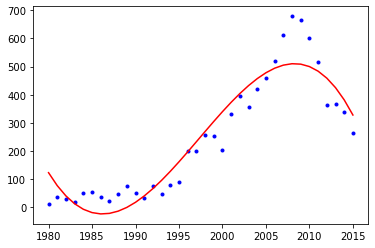

In [18]:
y_data=x[:35,1,np.newaxis] 
x_data=x[:35,0,np.newaxis]
model=LinearRegression()
model.fit(x_data,y_data)
poly_reg=PolynomialFeatures(degree=6)
x_poly=poly_reg.fit_transform(x_data)
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y_data)
plt.plot(x_data,y_data,'b.')
plt.plot(x_data,lin_reg.predict(x_poly),'r')
plt.show()

### 3.2 模型评价
* 求得回归模型的平均绝对误差、均方误差、解释方差分、R2得分，通过评价结果发现回归模型预测效果较好。

In [20]:
from sklearn import metrics
y_predict=lin_reg.predict(x_poly)
test_y=y_data
print('平均绝对误差:{}'.format(metrics.median_absolute_error(y_predict,test_y)))
print('均方误差MSE:{}'.format(metrics.mean_squared_error(y_predict,test_y)))
print('解释方差分：{}'.format(metrics.explained_variance_score(y_predict,test_y)))
print('R2得分：{}'.format(metrics.r2_score(y_predict,test_y)))

平均绝对误差:48.71807293146847
均方误差MSE:4901.370717271839
解释方差分：0.8740175284429984
R2得分：0.8740175284429985


## 4.可视化应用
- 根据多项式回归模型可以看出，电脑游戏的全球销量在1987-2009年之间持续上升，这与世界经济发展、文化交流与经济全球化是同步的，在2009年达到峰值，说明游戏销售模式在此已趋近成熟，市场对于游戏的需求趋于饱和。根据3A大作的发行时间来看，人们在2009年之后更偏向于购买大厂商的大制作，而3A大作的价格也偏高，因此总销量反而不如前几年，但总的来看，这是一种进步趋势，代表了人们精神需求的提升。